# CIFAR-10 Handwritten Digit Recognition with DNN

Author: [1chooo](https://1chooo.com)

### Import the package and the dataset

In [1]:
import tensorflow as tf
import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

2024-09-22 18:14:07.991482: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define the DNN model architecture

In [2]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

### Visualize the data type and the label!

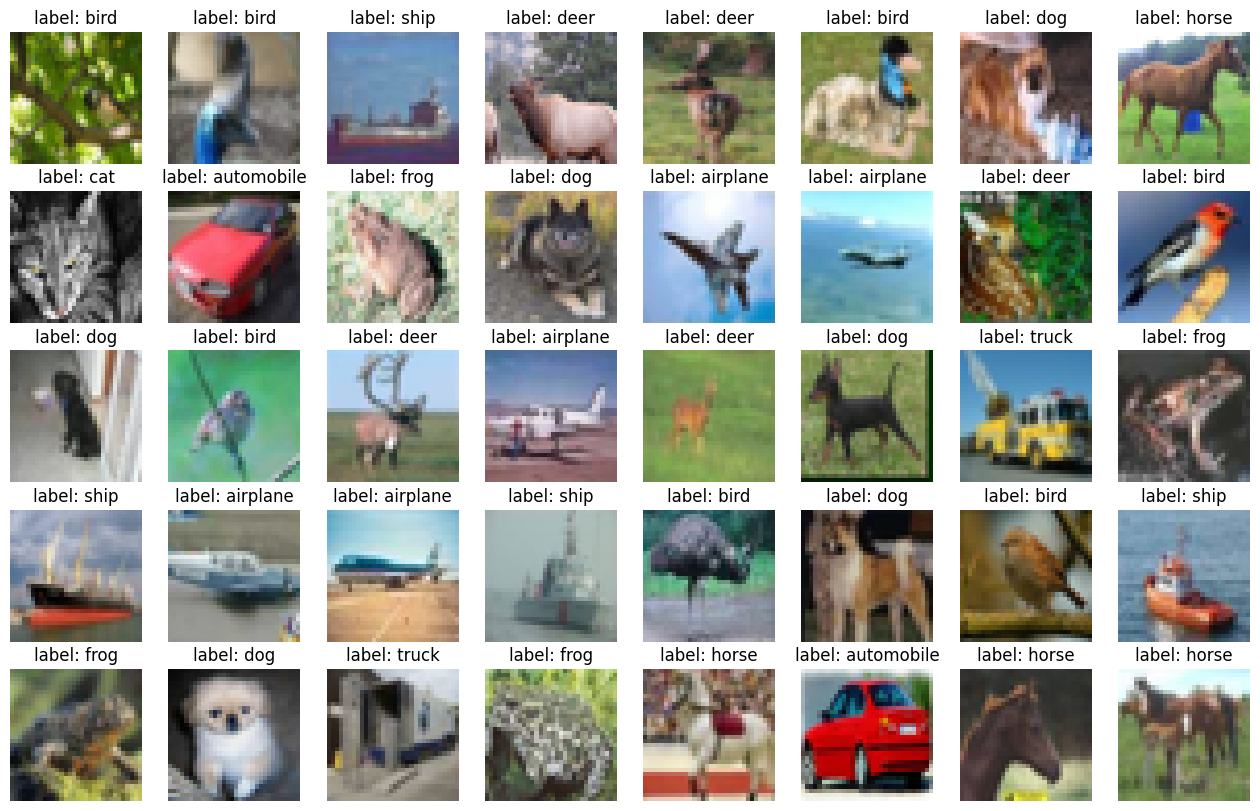

In [3]:
import matplotlib.pyplot as plt # pip install matplotlib
from random import randrange

text = ['airplane', 
        'automobile',
        'bird' ,
        'cat', 
        'deer', 
        'dog', 
        'frog', 
        'horse', 
        'ship', 
        'truck']
plt.figure(figsize=(16,10),facecolor='w')
for i in range(5):
  for j in range(8):
    index = randrange(0, 50000)
    plt.subplot(5, 8, i * 8 + j + 1)
    plt.title("label: {}".format(text[train_labels[index][0]]))
    plt.imshow(train_images[index])
    plt.axis('off')

plt.show()

In [4]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(test_images, test_labels)
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2538 - loss: 2.0163 - val_accuracy: 0.3360 - val_loss: 1.8192
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3417 - loss: 1.8139 - val_accuracy: 0.3586 - val_loss: 1.7775
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3573 - loss: 1.7724 - val_accuracy: 0.3676 - val_loss: 1.7396
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3607 - loss: 1.7539 - val_accuracy: 0.3645 - val_loss: 1.7418
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3670 - loss: 1.7348 - val_accuracy: 0.3754 - val_loss: 1.7141
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3787 - loss: 1.7117 - val_accuracy: 0.3781 - val_loss: 1.7250
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3775 - loss: 1.7034 - val_accuracy: 0.3827 - val_loss: 1.7053
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3844 - loss: 1.6803 - 

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

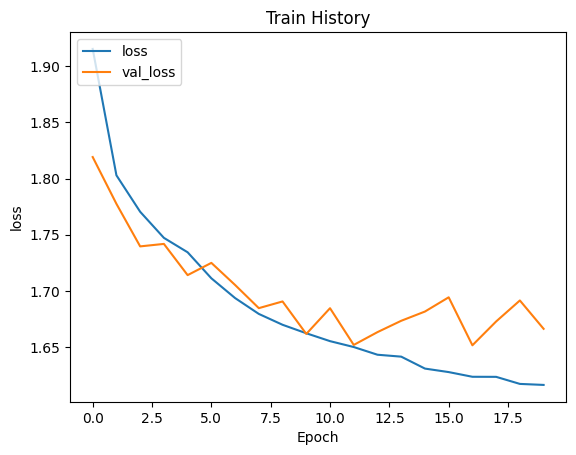

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

We find that about seven times, we can get the lowest `val_loss`, then we can re-compile our model again, and set the `epoches` to 14.

In [7]:
print('Test accuracy:', test_acc)

Test accuracy: 0.39469999074935913


In [8]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2492 - loss: 2.0170 - val_accuracy: 0.3427 - val_loss: 1.8232
Epoch 2/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3456 - loss: 1.8043 - val_accuracy: 0.3338 - val_loss: 1.8291
Epoch 3/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3541 - loss: 1.7747 - val_accuracy: 0.3692 - val_loss: 1.7496
Epoch 4/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3621 - loss: 1.7536 - val_accuracy: 0.3757 - val_loss: 1.7221
Epoch 5/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3641 - loss: 1.7494 - val_accuracy: 0.3504 - val_loss: 1.7769
Epoch 6/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3703 - loss: 1.7328 - val_accuracy: 0.3753 - val_loss: 1.7352
Epoch 7/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3771 - loss: 1.7223 - val_accuracy: 0.3804 - val_loss: 1.7165
Epoch 8/14
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3806 - loss: 1.7107 - 

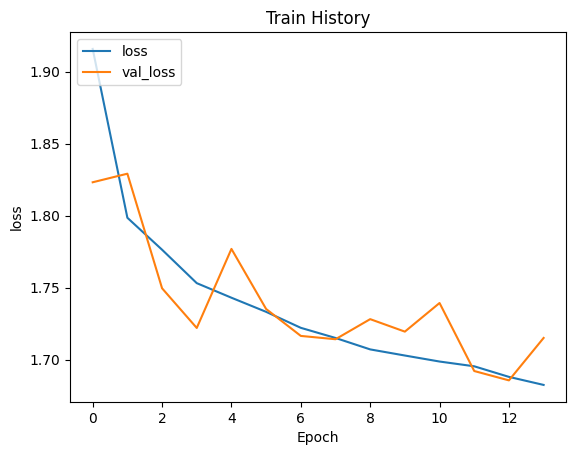

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [10]:
print('Test accuracy:', test_acc)

Test accuracy: 0.3797999918460846


The result of the test not change not much. And we set `epoches` to 7.

In [11]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=7, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2578 - loss: 1.9938 - val_accuracy: 0.3463 - val_loss: 1.7921
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3587 - loss: 1.7676 - val_accuracy: 0.3835 - val_loss: 1.7283
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3761 - loss: 1.7097 - val_accuracy: 0.3935 - val_loss: 1.6805
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3931 - loss: 1.6829 - val_accuracy: 0.3968 - val_loss: 1.6778
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4004 - loss: 1.6520 - val_accuracy: 0.3822 - val_loss: 1.6793
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3981 - loss: 1.6687 - val_accuracy: 0.3943 - val_loss: 1.6837
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4077 - loss: 1.6413 - val_accuracy: 0.3957 - val_loss: 1.6513
313/313 - 0s - 888us/step - accuracy: 0.3957 - loss: 1.6513


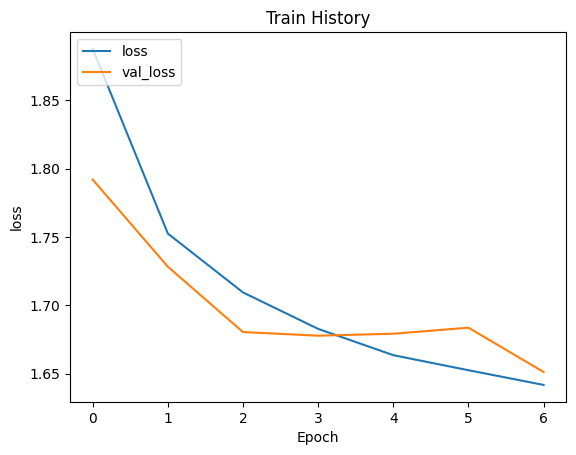

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [13]:
print('Test accuracy:', test_acc)

Test accuracy: 0.39570000767707825


We still pickup the `epoches` to 14.

#### The result of the test not change a lot! Also get worse!

Then we can try other variables to improve the result of our model.

### Now we add the `bastch_size`

In [14]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2255 - loss: 2.0522 - val_accuracy: 0.3235 - val_loss: 1.8433
Epoch 2/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3186 - loss: 1.8492 - val_accuracy: 0.3121 - val_loss: 1.8840
Epoch 3/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3337 - loss: 1.8199 - val_accuracy: 0.3364 - val_loss: 1.8120
Epoch 4/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3391 - loss: 1.8099 - val_accuracy: 0.3423 - val_loss: 1.8004
Epoch 5/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3498 - loss: 1.7913 - val_accuracy: 0.3483 - val_loss: 1.7860
Epoch 6/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3523 - loss: 1.7780 - val_accuracy: 0.3489 - val_loss: 1.7797
Epoch 7/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3562 - loss: 1.7706 - val_accuracy: 0.3577 - val_loss: 1.7649
Epoch 8/14
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3614 - loss: 1.7648 - val_accuracy: 0.

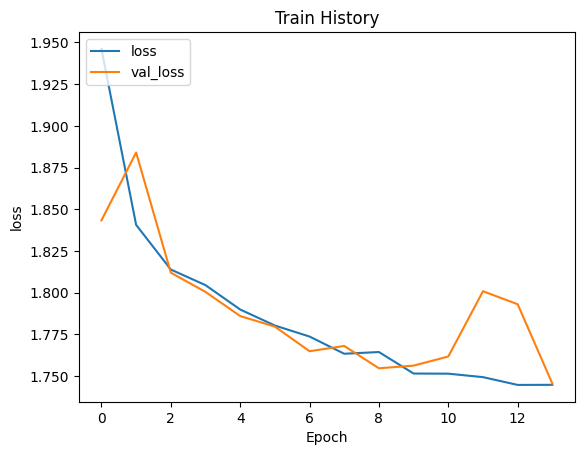

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [16]:
print('Test accuracy:', test_acc)

Test accuracy: 0.3617999851703644


#### The result of the test truly increases! Then we can find it may occur overfitting at `epoches 9` then we change the epoches


In [17]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=100
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2423 - loss: 2.0453 - val_accuracy: 0.3645 - val_loss: 1.7788
Epoch 2/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3638 - loss: 1.7756 - val_accuracy: 0.3875 - val_loss: 1.7200
Epoch 3/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3818 - loss: 1.7172 - val_accuracy: 0.3995 - val_loss: 1.6797
Epoch 4/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3922 - loss: 1.6837 - val_accuracy: 0.4090 - val_loss: 1.6573
Epoch 5/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4058 - loss: 1.6630 - val_accuracy: 0.4100 - val_loss: 1.6572
Epoch 6/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4137 - loss: 1.6394 - val_accuracy: 0.4064 - val_loss: 1.6644
Epoch 7/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4130 - loss: 1.6319 - val_accuracy: 0.4136 - val_loss: 1.6271
Epoch 8/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4170 - loss: 1.6126 - val_accuracy: 0.4212 - v

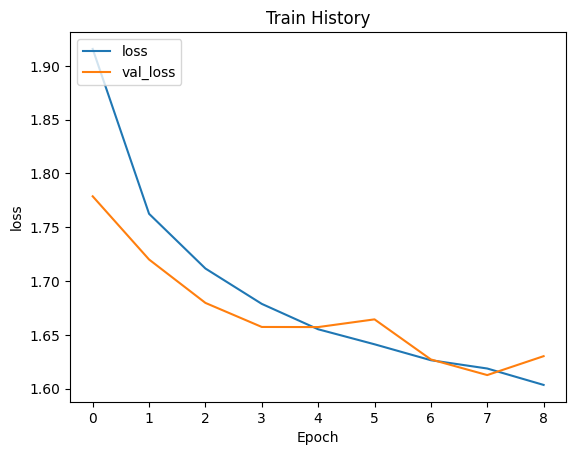

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [19]:
print('Test accuracy:', test_acc)

Test accuracy: 0.4189999997615814


#### However, the accuracy decrease, then we still set our `epoches` to 14. Now we try to increase the speed of training, we set the `batch_size` larger.

In [20]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=9, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1995 - loss: 2.1435 - val_accuracy: 0.3291 - val_loss: 1.8730
Epoch 2/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3374 - loss: 1.8482 - val_accuracy: 0.3651 - val_loss: 1.7839
Epoch 3/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3717 - loss: 1.7665 - val_accuracy: 0.3895 - val_loss: 1.7245
Epoch 4/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3913 - loss: 1.7168 - val_accuracy: 0.4014 - val_loss: 1.6855
Epoch 5/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3977 - loss: 1.6818 - val_accuracy: 0.4108 - val_loss: 1.6611
Epoch 6/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4034 - loss: 1.6628 - val_accuracy: 0.4125 - val_loss: 1.6650
Epoch 7/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4195 - loss: 1.6307 - val_accuracy: 0.4284 - val_loss: 1.6237
Epoch 8/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4296 - loss: 1.5998 - val_accuracy: 0.4231 - 

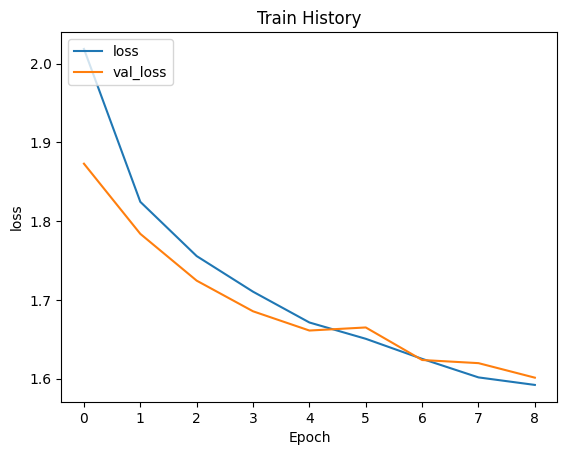

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [22]:
print('Test accuracy:', test_acc)

Test accuracy: 0.4302999973297119


#### We find that when we adjust our `batch_size` larger, we can also increase the result of our model!

### Test accuracy: 0.4408000111579895




Then we can try another test to change our `optimizer`.

In [23]:
def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [24]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=14, 
    validation_data=(test_images, test_labels),
    batch_size=500
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1611 - loss: 2.2390 - val_accuracy: 0.2952 - val_loss: 1.9758
Epoch 2/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2761 - loss: 1.9886 - val_accuracy: 0.2834 - val_loss: 1.9689
Epoch 3/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3192 - loss: 1.8852 - val_accuracy: 0.3481 - val_loss: 1.8264
Epoch 4/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3401 - loss: 1.8375 - val_accuracy: 0.3505 - val_loss: 1.7990
Epoch 5/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3503 - loss: 1.8037 - val_accuracy: 0.3683 - val_loss: 1.7451
Epoch 6/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3657 - loss: 1.7665 - val_accuracy: 0.3696 - val_loss: 1.7483
Epoch 7/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3721 - loss: 1.7536 - val_accuracy: 0.4001 - val_loss: 1.6704
Epoch 8/14
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3806 - loss: 1.7341 - val_accuracy: 0

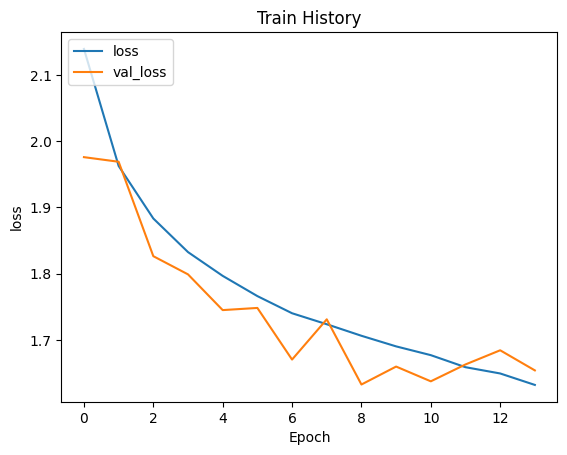

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Train History")
plt.ylabel("loss")
plt.xlabel("Epoch")

plt.legend(["loss", "val_loss"], loc = "upper left")
plt.show()

In [26]:
print('Test accuracy:', test_acc)

Test accuracy: 0.40950000286102295


### Test accuracy: 0.4668000042438507

And we found that the `val_loss` and `loss` more smoothly.

## My gained knowledge

I have tested a lot of experiment to improve the model; however, all of the results still surround to about forty percent accuracy. 

#### Below are the experiments I have conducted:
* `epoches: from 20 -> 14 -> 9 -> 14`.
* `batch_size: from 100 -> 500`.
* `optimizer: adam and rmsprop`.

Even though I designed a lot of experiments, the accuracy did not increase significantly. I have considered the reasons, and here are my conclusions. 

First, our Deep Neural-Network model was limited by the size of the CIFAR-10 dataset, which consisted of up to 50000 training_data and up to 10000 testing_data. The larger datasets made it difficult for the DNN model to capture all the necessary values during training, which resulted in less accuracy even when we changed several variables. 

Second, given the large amount of data, I could have tried to drop out the data that affected the results. However, I thought that we might be able to choose the Convolutional Neural-Network instead because it was more suitable for dropping out the worse neural in our model.

In conclusion, I am excited to have the opportunity to improve my deep-learning skills with this dataset and to review what I have learned before.

### Reference

* [Day 20 ~ AI從入門到放棄 - 新的資料集](https://ithelp.ithome.com.tw/articles/10248873)
* [簡單使用keras 架構深度學習神經網路 — 以cifar10為例](https://medium.com/@a227799770055/%E7%B0%A1%E5%96%AE%E4%BD%BF%E7%94%A8keras-%E6%9E%B6%E6%A7%8B%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E4%BB%A5cifar10%E7%82%BA%E4%BE%8B-b8921ca239cf)